In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
dataset = pd.read_csv('diabetes (1).csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
x = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [4]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [5]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

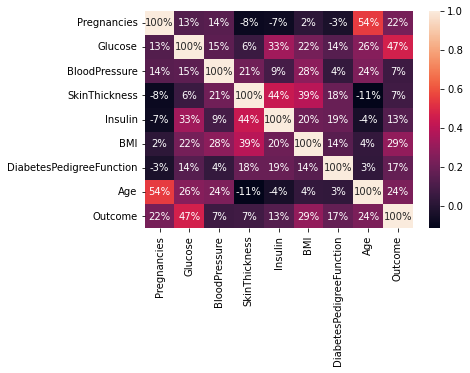

In [6]:
import seaborn as sns
sns.heatmap(dataset.corr(),fmt='.0%',annot=True)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

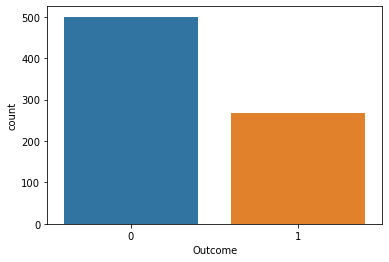

In [7]:
sns.countplot(dataset['Outcome'])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
predict1 = knn.predict(x_test)
predict1

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [10]:
y_test

151    0
33     0
76     0
274    0
486    0
      ..
308    1
49     0
415    1
530    0
18     0
Name: Outcome, Length: 77, dtype: int64

In [11]:
count_missclassified1 = (y_test!=predict1).sum()
count_missclassified1

25

In [12]:
from sklearn import metrics
accuracy1 = metrics.accuracy_score(y_test,predict1)
accuracy1*100

67.53246753246754

In [13]:
c_f1 = metrics.classification_report(y_test,predict1)
print(c_f1)

              precision    recall  f1-score   support

           0       0.82      0.71      0.76        56
           1       0.43      0.57      0.49        21

    accuracy                           0.68        77
   macro avg       0.62      0.64      0.63        77
weighted avg       0.71      0.68      0.69        77



In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [15]:
predict2 = lr.predict(x_test)
predict2

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [16]:
count_missclassified2 = (y_test!=predict2).sum()
count_missclassified2

19

In [17]:
accuracy2 = metrics.accuracy_score(y_test,predict2)
accuracy2*100

75.32467532467533

In [18]:
c_f2 = metrics.classification_report(y_test,predict2)
print(c_f2)

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        56
           1       0.54      0.62      0.58        21

    accuracy                           0.75        77
   macro avg       0.70      0.71      0.70        77
weighted avg       0.77      0.75      0.76        77



In [19]:
n = [[4,52,12,47,0,52,125,74]]
pred = lr.predict(n)
pred

array([1], dtype=int64)

In [20]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
dtree.fit(x_train,y_train)
predict3 = dtree.predict(x_test)
predict3

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
count_missclassified3 = (y_test!=predict3).sum()
count_missclassified3

30

In [22]:
accuracy3 = metrics.accuracy_score(y_test,predict3)
accuracy3*100

61.038961038961034

In [23]:
c_f3 = metrics.classification_report(y_test,predict3)
print(c_f3)

              precision    recall  f1-score   support

           0       0.76      0.68      0.72        56
           1       0.33      0.43      0.38        21

    accuracy                           0.61        77
   macro avg       0.55      0.55      0.55        77
weighted avg       0.64      0.61      0.62        77

